In [32]:

#Python 3 notebook
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil


In [33]:
df = pd.read_csv('data.csv',header = 1, names =['date', 'prices', 'gold', 'compound', 'neg', 'neu', 'pos' ] )
df = df.set_index('date')
#Obtaining the past data in a different column
df['past_prices'] = df.loc[:,'prices'].shift(7)
df = df.iloc[7:df.shape[0]]
#Splitting train and test dataset
train_size = floor(0.8*df.shape[0])
train = df.iloc[0:train_size]
test = df.iloc[train_size:]
print('Total data size: ',df.shape[0],'. Train data size: ', train.shape[0], '. Test data size: ', test.shape[0], '.',sep='')

Total data size: 1175. Train data size: 940. Test data size: 235.


In [34]:
#df


,prices,gold,compound,neg,neu,pos,past_prices
date,,,,,,,
2013-05-13,1535,1429.75,0.9991,0.111,0.754,0.136,1442.0
2013-05-14,1539,1436.50,0.9978,0.133,0.718,0.149,1428.0
2013-05-15,1565,1412.25,-0.9975,0.132,0.755,0.113,1424.0
2013-05-16,1658,1377.00,0.9990,0.123,0.730,0.147,1446.0
2013-05-17,1570,1376.75,0.9992,0.113,0.747,0.140,1519.0
2013-05-20,1613,1353.75,-0.9839,0.114,0.777,0.109,1539.0
2013-05-21,1591,1378.75,-0.9995,0.139,0.760,0.101,1549.0
2013-05-22,1589,1385.25,-0.9993,0.145,0.743,0.112,1535.0
2013-05-23,1567,1386.00,-0.9997,0.169,0.700,0.131,1539.0


In [35]:
#train


,prices,gold,compound,neg,neu,pos,past_prices
date,,,,,,,
2013-05-13,1535,1429.75,0.9991,0.111,0.754,0.136,1442.0
2013-05-14,1539,1436.50,0.9978,0.133,0.718,0.149,1428.0
2013-05-15,1565,1412.25,-0.9975,0.132,0.755,0.113,1424.0
2013-05-16,1658,1377.00,0.9990,0.123,0.730,0.147,1446.0
2013-05-17,1570,1376.75,0.9992,0.113,0.747,0.140,1519.0
2013-05-20,1613,1353.75,-0.9839,0.114,0.777,0.109,1539.0
2013-05-21,1591,1378.75,-0.9995,0.139,0.760,0.101,1549.0
2013-05-22,1589,1385.25,-0.9993,0.145,0.743,0.112,1535.0
2013-05-23,1567,1386.00,-0.9997,0.169,0.700,0.131,1539.0


In [39]:
#test

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()


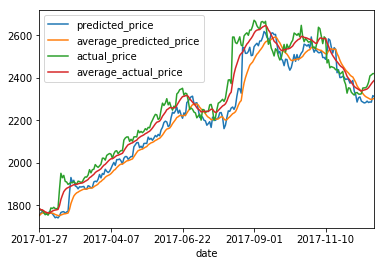

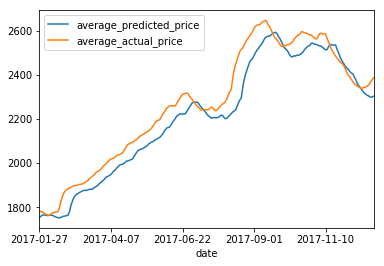

In [40]:
from treeinterpreter import treeinterpreter as ti
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month


prediction_list = []

sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'gold'],df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos'],df.loc[date, 'past_prices']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'gold'],df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos'],df.loc[date, 'past_prices']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

 # Generating models
lr = LinearRegression()
lr.fit(numpy_df_train, train['prices'])

prediction = lr.predict(numpy_df_test)
prediction_list.append(prediction)
#print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date

test_start_date = '2017-01-27'
test_end_date = '2018-01-02'
#train_start_date = '2013-05-13'
#train_end_date = '2017-01-26'
#idx = pd.date_range(test_start_date, test_end_date)
idx = test.index
#print year
predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
#difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list,idx)
# Adding offset to all the advpredictions_df price values
#predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices

#predictions_df_list['actual_value'] = test['prices']
#predictions_df_list.plot()
# Smoothing the plot
predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10)
predictions_df_list['actual_value'] = test['prices']
predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10)
# Changing column names
predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
predictions_df_list.plot()
predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
predictions_df_list_average.plot()
#plt.plot( range(0,test.shape[0]), predictions_df_list, range(0,test.shape[0]), test_data.loc[:,'prices'].as_matrix())
#predictions_df_list.show()
plt.show()




    
